# NB 1. Steam Game Sales Data Exploration

---

## 1. Introduction

This notebook performs exploratory data analysis on Steam game sales data, examining pricing patterns, discounts, platform availability, and release trends.

**Goals:**
- **Data Cleaning:** Load and prepare the raw Steam sales data for analysis
- **Basic Exploration:** Understand the structure of the data, what information it contains, and the relationships between variables
- **Produce Clean Dataset:** Filter and export a refined dataset (2015-2024) for further inflation-adjusted price analysis



---
## 2. Data Loading and Preparation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


This cell loads the Steam sales dataset and performs initial data cleaning:

1. **Load the dataset** from the CSV file
2. **Clean column names** - Convert to snake_case for consistency and easier coding
3. **Clean numeric columns** - Remove commas from review counts and convert to float
4. **Parse dates** - Convert release dates from strings to datetime objects for time-based analysis
5. **Display overview** - Show dataset info, first rows, shape, and summary statistics

In [2]:
steam_sales_path = "../data/steam_sales.csv"
df = pd.read_csv(steam_sales_path)

# Clean column names: convert to snake_case for consistency
column_mapping = {
    'Game Name': 'game_name',
    'Rating': 'rating',
    '#Reviews': 'num_reviews',
    'Discount%': 'discount_pct',
    'Price (€)': 'price_eur',
    'Original Price (€)': 'original_price_eur',
    'Release Date': 'release_date',
    'Windows': 'windows',
    'Linux': 'linux',
    'MacOS': 'macos',
    'Fetched At': 'fetched_at'
}
df = df.rename(columns=column_mapping)

# Clean num_reviews column: remove commas and convert to float
df['num_reviews'] = df['num_reviews'].str.replace(',', '', regex=False).astype(float)

# Convert release_date to datetime for easier time-based analysis
df['release_date'] = pd.to_datetime(df['release_date'], format="%d %b, %Y", errors='coerce')

# Quick overview
print("Dataset info:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print(f"\nShape of dataset: {df.shape}")
print("\nSummary statistics:")
display(df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   game_name           2543 non-null   object        
 1   rating              2543 non-null   float64       
 2   num_reviews         2543 non-null   float64       
 3   discount_pct        2543 non-null   float64       
 4   price_eur           2543 non-null   float64       
 5   original_price_eur  2543 non-null   float64       
 6   release_date        732 non-null    datetime64[ns]
 7   windows             2543 non-null   int64         
 8   linux               2543 non-null   int64         
 9   macos               2543 non-null   int64         
 10  fetched_at          2543 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 218.7+ KB
None

First 5 rows:


,game_name,rating,num_reviews,discount_pct,price_eur,original_price_eur,release_date,windows,linux,macos,fetched_at
0,PEAK,7.0,77683.0,-38.0,4.64,7.49,2025-06-16,1,0,0,2025-08-11 00:00
1,Cyberpunk 2077,7.0,772574.0,-65.0,20.99,59.99,2020-12-09,1,0,1,2025-08-11 00:00
2,Rust,7.0,1038433.0,-50.0,19.99,39.99,2018-02-08,1,0,1,2025-08-11 00:00
3,Microsoft Flight Simulator (2020) 40th Anniver...,5.0,63905.0,-60.0,27.99,69.99,2020-08-17,1,0,0,2025-08-11 00:00
4,Sid Meier's Civilization VII,4.0,34643.0,-30.0,48.99,69.99,2025-02-10,1,1,1,2025-08-11 00:00



Shape of dataset: (2543, 11)

Summary statistics:


,rating,num_reviews,discount_pct,price_eur,original_price_eur,release_date,windows,linux,macos
count,2543.000000,2.543000e+03,2543.000000,2543.000000,2543.000000,732,2543.000000,2543.000000,2543.000000
mean,6.433346,1.845428e+04,-51.055053,12.742993,27.949866,2021-09-30 02:55:04.918032896,0.996068,0.185608,0.281950
min,3.000000,1.000000e+01,-95.000000,0.530000,2.990000,2006-12-07 00:00:00,0.000000,0.000000,0.000000
25%,5.000000,1.013500e+03,-74.500000,5.990000,15.990000,2019-09-20 12:00:00,1.000000,0.000000,0.000000
50%,7.000000,3.344000e+03,-50.000000,9.990000,24.990000,2022-12-07 00:00:00,1.000000,0.000000,0.000000
75%,7.000000,1.391550e+04,-30.000000,16.990000,39.990000,2024-10-07 12:00:00,1.000000,0.000000,1.000000
max,8.000000,1.038433e+06,-10.000000,64.990000,99.990000,2025-09-14 00:00:00,1.000000,1.000000,1.000000
std,1.279637,5.650066e+04,23.132706,8.990933,15.762686,NaN,0.062597,0.388866,0.450038


**Summary Statistics Interpretation:**

- **Dataset Overview**: 2,543 games with complete numerical data.
- **Ratings**: Average rating of 6.4 out of 8, indicating generally positive reception
- **Discounts**: Average discount of 51%, showing most games are sold below original price
- **Pricing**: Mean discounted price €12.74 vs. original price €27.95 (54% reduction on average)
- **Platform Support**: Nearly all games support Windows (99.6%), while Linux (18.6%) and MacOS (28.2%) have much lower availability

*Note: The release date column is excluded from numerical statistics as it's a datetime type, but it's available for time-based analysis.*


---
## 3. Correlation Analysis

This heatmap visualizes the correlation coefficients between all numerical variables in the dataset. Correlation values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship. This helps identify relationships between variables like price, ratings, reviews, discounts, and platform availability.

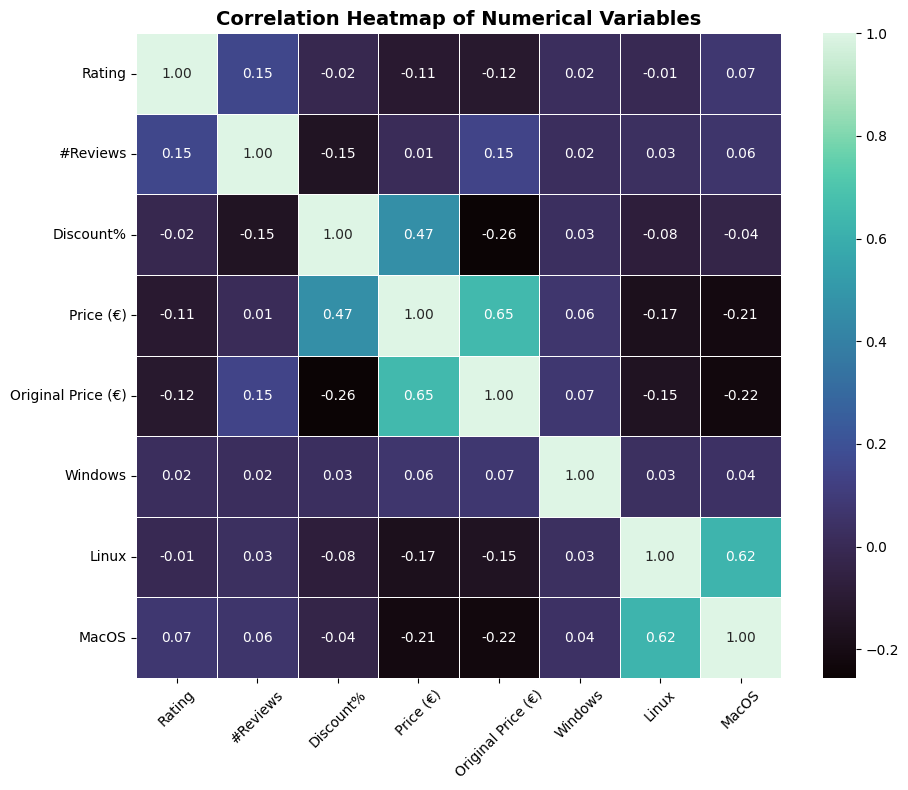

In [3]:
plt.figure(figsize=(10, 8))
correlation_cols = ['rating', 'num_reviews', 'discount_pct', 'price_eur', 
                     'original_price_eur', 'windows', 'linux', 'macos']

# Reverse the original column_mapping to get original names for display
reverse_mapping = {v: k for k, v in column_mapping.items()}

# Calculate correlation matrix
corr_matrix = df[correlation_cols].corr()

# Rename columns and index to original names for display
corr_matrix_display = corr_matrix.rename(columns=reverse_mapping, index=reverse_mapping)

sns.heatmap(corr_matrix_display, annot=True, cmap='mako', 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/nb1/sec_3_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Correlation Heatmap Analysis:**

**Strong Correlations**
- **Price ↔ Original Price (0.65)**
  - Current prices closely follow original prices.
  - Price tiers stay consistent: premium games remain premium, and budget titles remain budget.
- **Linux ↔ MacOS Support (0.62)**
  - Games that support Linux almost always support MacOS.
  - Developers typically release to both non-Windows platforms together.

**Moderate Correlations**
- **Discount% ↔ Price (0.47)**
  - Higher-priced games receive larger discounts.
  - Deep cuts on premium games are more profitable and more compelling during major sales.

**Notable Weak Patterns**
- **Rating ↔ Price (-0.11)**: Slight trend where cheaper games score higher.
- **Original Price ↔ Discount% (-0.26)**: Indie games go on deeper percentage discounts.
- **Price ↔ Linux/MacOS (-0.15 to -0.22)**: Some expensive AAA games are Windows-only. 

**Very Weak or No Correlation**
- **#Reviews ↔ Price (≈0)**: Review count is independent of current price.
- **Rating ↔ Platform Support (≈0)**: Quality does not depend on platform count.

**Key Takeaways:**
- Some expensive games are Windows-only (slight negative correlation for Linux/MacOS availability and Price suggests expensive games tend to be Windows-exclusive) 
- Prices are "sticky": sale prices still reflect original tiers
- Cross-platform support comes as a pair: Linux and MacOS are usually bundled
- Discount patterns depend on price: expensive games discount more deeply
- Ratings are value-driven: cheaper games often over-perform


---
## 4. Platform Analysis

### 4.1 Platform Availability

This visualization shows the total number of games available on each platform. This helps understand platform market share and the distribution of game availability across Windows, Linux, and MacOS.

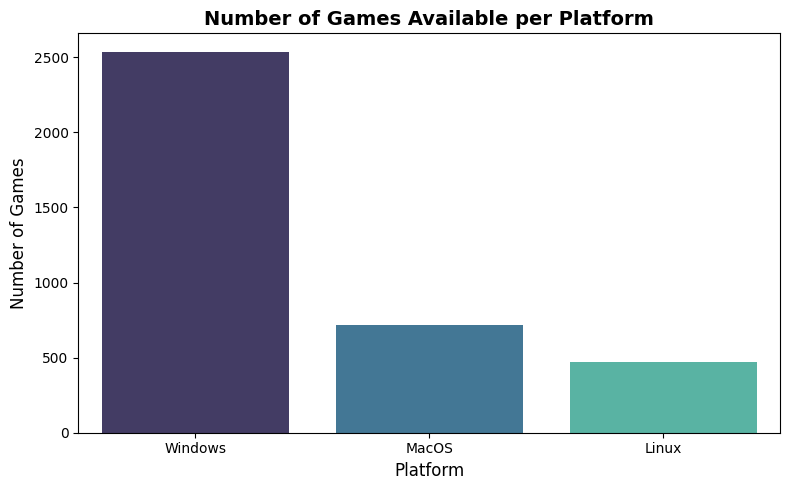

In [4]:
platform_counts = df[['windows', 'linux', 'macos']].sum().sort_values(ascending=False)

# Map platform names back to original names for display
reverse_mapping = {v: k for k, v in column_mapping.items()}
platform_counts_display = platform_counts.rename(index=reverse_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(x=platform_counts_display.index, y=platform_counts_display.values, 
            hue=platform_counts_display.index, palette='mako', legend=False)
plt.title('Number of Games Available per Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.tight_layout()
plt.savefig('images/nb1/sec_4-1_platform_availability.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Top Rated Games by Platform

This analysis identifies the highest-rated games for each platform (Windows, Linux, MacOS). Games are sorted by rating in descending order to highlight the best-reviewed titles available on each platform.

In [5]:
platforms = ['windows', 'linux', 'macos']
platform_display_names = {'windows': 'Windows', 'linux': 'Linux', 'macos': 'MacOS'}
top_n = 5

for plat in platforms:
    print(f"Top {top_n} games for {platform_display_names[plat]}:")
    display(
        df[df[plat] == 1]
        .sort_values('rating', ascending=False)
        .head(top_n)
        [['game_name', 'rating', 'price_eur', 'discount_pct']]
    )

Top 5 games for Windows:


,game_name,rating,price_eur,discount_pct
2128,Arctic Eggs,8.0,4.99,-50.0
284,ROUNDS,8.0,2.74,-50.0
1903,Human Fall Flat,8.0,5.99,-70.0
538,SOMA,8.0,8.99,-70.0
935,FlyKnight,8.0,4.79,-20.0


Top 5 games for Linux:


,game_name,rating,price_eur,discount_pct
1021,Astral Ascent,8.0,12.49,-50.0
415,Is This Seat Taken?,8.0,8.99,-10.0
1080,Danganronpa: Trigger Happy Havoc,8.0,13.99,-30.0
1075,The Jackbox Party Pack 4,8.0,11.24,-55.0
1480,Dead Cells,8.0,10.99,-50.0


Top 5 games for MacOS:


,game_name,rating,price_eur,discount_pct
1784,Beastieball,8.0,16.99,-15.0
1269,The Henry Stickmin Collection,8.0,5.99,-60.0
2022,NEEDY STREAMER OVERLOAD,8.0,7.99,-50.0
737,Baldur's Gate 3,8.0,44.99,-25.0
802,Slay the Spire,8.0,8.49,-66.0


### 4.3 Original Price Distribution by Platform

This analysis compares the distribution of original prices across different platforms (Windows, Linux, MacOS) using box plots. Box plots reveal the median, quartiles, and outliers for each platform, helping identify whether certain platforms tend to host games at different price points. This visualization complements the earlier correlation findings about platform pricing patterns.


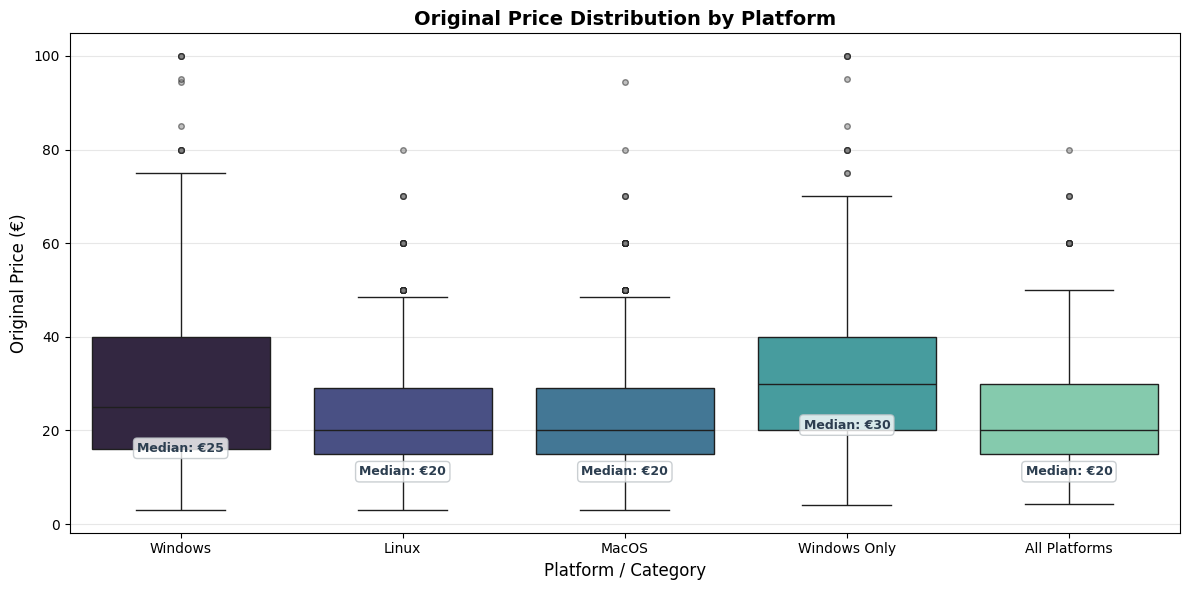

In [6]:
# Configuration
SHOW_STATS = False  # Set to True to print summary statistics

# Reshape data for box plot: create a row per platform/category per game
platform_price_data = []

# Individual platforms
platform_display_names = {'windows': 'Windows', 'linux': 'Linux', 'macos': 'MacOS'}
for plat in platforms:
    plat_df = df[df[plat] == 1][['original_price_eur']].copy()
    plat_df['category'] = platform_display_names[plat]
    platform_price_data.append(plat_df)

# Windows-exclusive games (Windows only, no Linux or MacOS)
windows_exclusive = df[(df['windows'] == 1) & (df['linux'] == 0) & (df['macos'] == 0)][['original_price_eur']].copy()
windows_exclusive['category'] = 'Windows Only'
platform_price_data.append(windows_exclusive)

# All platforms (Windows, Linux, and MacOS)
all_platforms = df[(df['windows'] == 1) & (df['linux'] == 1) & (df['macos'] == 1)][['original_price_eur']].copy()
all_platforms['category'] = 'All Platforms'
platform_price_data.append(all_platforms)

platform_price_df = pd.concat(platform_price_data, ignore_index=True)

# Define order for display
category_order = ['Windows', 'Linux', 'MacOS', 'Windows Only', 'All Platforms']

# Create box plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='category', 
    y='original_price_eur', 
    data=platform_price_df,
    hue='category',
    palette='mako',
    legend=False,
    order=category_order,
    showfliers=True,
    flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 4, 'alpha': 0.5}
)

# Add median value annotations
medians = platform_price_df.groupby('category')['original_price_eur'].median()
for i, cat in enumerate(category_order):
    median_val = medians[cat]
    ax.annotate(f'Median: €{median_val:.0f}', 
                xy=(i, median_val), 
                xytext=(0, -25),
                textcoords='offset points',
                ha='center', va='top',
                fontsize=9, fontweight='bold', color='#2C3E50',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#BDC3C7', alpha=0.8))

plt.title('Original Price Distribution by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform / Category', fontsize=12)
plt.ylabel('Original Price (€)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/nb1/sec_4-3_price_distribution_by_platform.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics (optional)
if SHOW_STATS:
    print("\nSummary Statistics: Original Price by Platform/Category")
    print("=" * 65)

    # Individual platforms
    for plat in platforms:
        prices = df[df[plat] == 1]['original_price_eur']
        print(f"\n{plat.capitalize()}:")
        print(f"  Count:  {len(prices):,}")
        print(f"  Mean:   €{prices.mean():.2f}")
        print(f"  Median: €{prices.median():.2f}")
        print(f"  Std:    €{prices.std():.2f}")

    # Windows-exclusive
    prices_win_only = df[(df['windows'] == 1) & (df['linux'] == 0) & (df['macos'] == 0)]['original_price_eur']
    print(f"\nWindows Only (exclusive):")
    print(f"  Count:  {len(prices_win_only):,}")
    print(f"  Mean:   €{prices_win_only.mean():.2f}")
    print(f"  Median: €{prices_win_only.median():.2f}")
    print(f"  Std:    €{prices_win_only.std():.2f}")

    # All platforms
    prices_all = df[(df['windows'] == 1) & (df['linux'] == 1) & (df['macos'] == 1)]['original_price_eur']
    print(f"\nAll Platforms:")
    print(f"  Count:  {len(prices_all):,}")
    print(f"  Mean:   €{prices_all.mean():.2f}")
    print(f"  Median: €{prices_all.median():.2f}")
    print(f"  Std:    €{prices_all.std():.2f}")


#### Price Distribution Insights

- **Windows spans the full price spectrum**: Since nearly all PC games support Windows, its catalog includes everything from low-cost indie titles to premium AAA releases, resulting in the widest price distribution.
- **Windows-exclusive games skew higher-priced**: Titles released only on Windows show higher median prices and more high-priced outliers. This reflects the dominance of AAA publishers on Windows and the ability to target a wide range of high-performance PC hardware.
- **Cross-platform games are generally cheaper**: Games available on Windows, Linux, and macOS have lower median prices. This segment is dominated by indie titles, which are designed to run on modest hardware and are built using cross-platform engines such as Unity or Godot.
- **Linux and macOS mirror the cross-platform market**: Most games available on Linux or macOS are also cross-platform indie releases, so their price distributions closely resemble that of the “All Platforms” category.

#### Core Takeaway: Hardware Accessibility on Windows

- **Windows offers the most accessible and scalable gaming hardware ecosystem**: From low-end laptops to high-end gaming rigs, Windows supports a broader range of hardware configurations than Linux or macOS.
- **This flexibility enables market segmentation**:
  - **Premium segment**: Windows-exclusive titles that leverage high-end hardware and command higher prices.
  - **Value segment**: Cross-platform titles designed for accessibility, lower system requirements, and lower price points.

Overall, the pricing patterns suggest that broader hardware accessibility on Windows enables both high-end, hardware-intensive games and affordable, widely compatible indie releases to coexist in the same ecosystem.




---
## 5. Discount Analysis

### 5.1 Discount Distribution

This histogram shows the distribution of discount percentages across all games in the dataset. Understanding discount patterns helps identify common pricing strategies, such as whether games typically go on sale at specific discount levels (e.g., 50%, 70%, etc.).

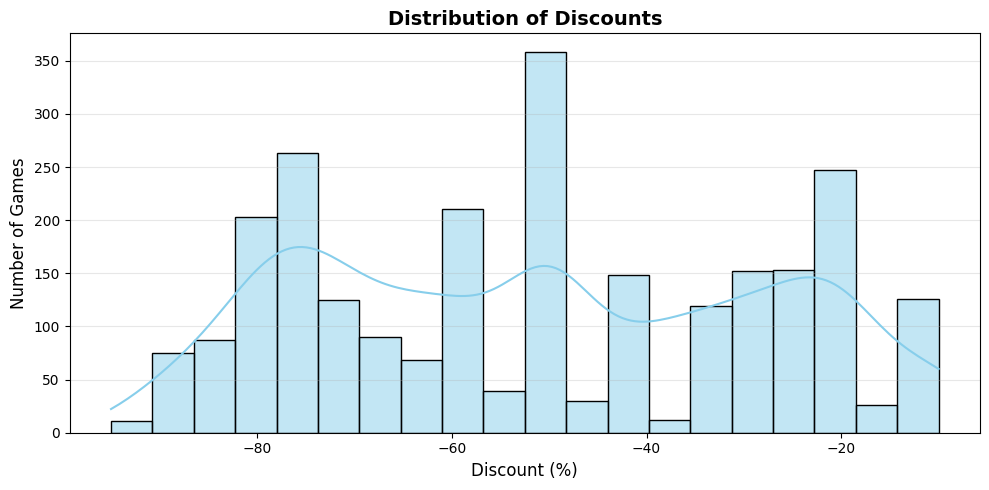

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['discount_pct'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Discounts', fontsize=14, fontweight='bold')
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/nb1/sec_5-1_discount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### 5.2 Average Discount by Platform

This analysis compares the average discount percentage across different platforms. This helps identify whether certain platforms tend to have more aggressive discounting strategies or if pricing patterns differ between Windows, Linux, and MacOS.

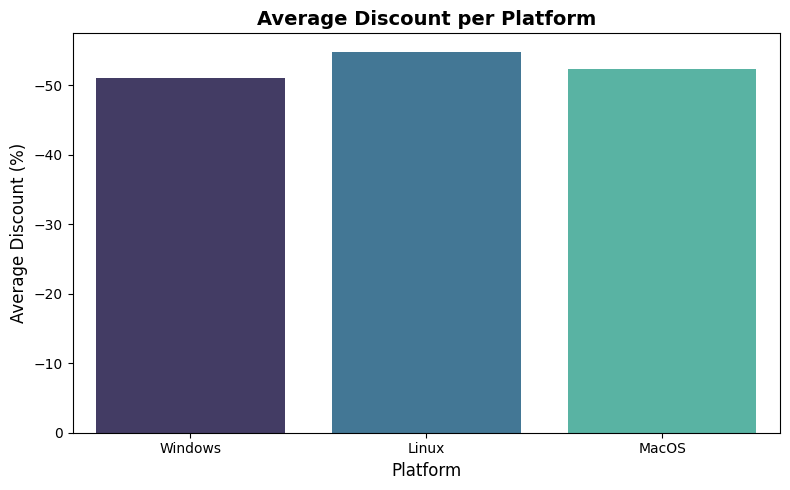

In [8]:
avg_discount = {plat: df[df[plat] == 1]['discount_pct'].mean() for plat in platforms}

# Map platform names back to original names for display
reverse_mapping = {v: k for k, v in column_mapping.items()}
avg_discount_display = {reverse_mapping[plat]: avg_discount[plat] for plat in platforms}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_discount_display.keys()), y=list(avg_discount_display.values()), 
            hue=list(avg_discount_display.keys()), palette='mako', legend=False)
plt.title('Average Discount per Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Discount (%)', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('images/nb1/sec_5-2_avg_discount_by_platform.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The average discount percentages are nearly identical across all three platforms (~51%). This suggests that **platform availability has no significant relationship with discounting behavior**—games are discounted at similar rates regardless of whether they're Windows-only or cross-platform releases.



---
## 6. Release Trends

### 6.1 Game Release Distribution by Year

This analysis visualizes how many games were released each year on Steam. The chart shows the evolution of Steam as a publishing platform, highlighting periods of growth, decline, or stability in game releases over time.

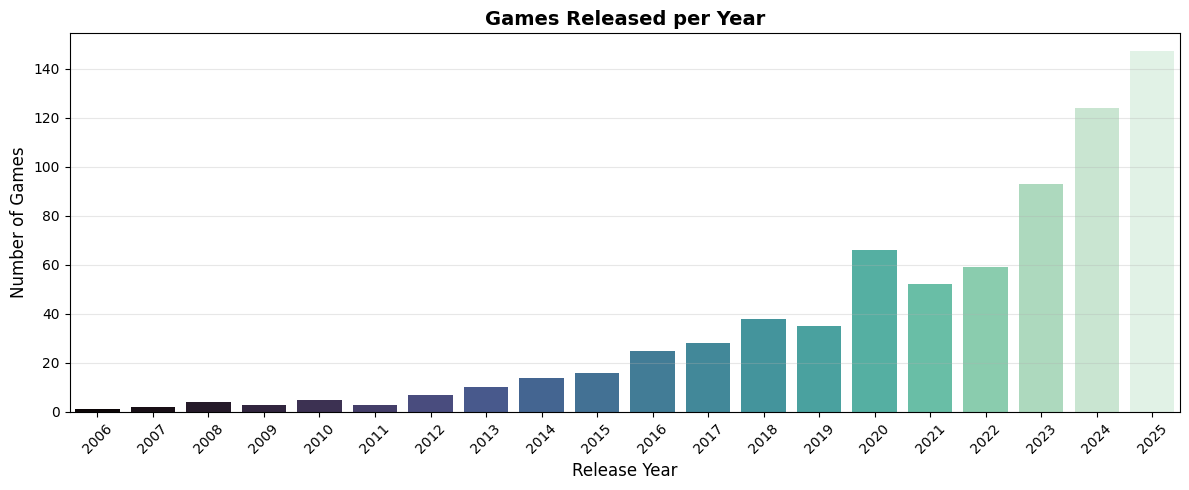

In [9]:
df['release_year'] = df['release_date'].dt.year

# For plotting, use only rows with a year and cast to plain int
plot_df = df[df['release_year'].notna()].copy()
plot_df['release_year_int'] = plot_df['release_year'].astype(int)

order = sorted(plot_df['release_year_int'].unique())

plt.figure(figsize=(12, 5))
sns.countplot(
    x='release_year_int',
    hue='release_year_int',
    data=plot_df,
    palette='mako',
    order=order,
    legend=False
)
plt.title('Games Released per Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/nb1/sec_6-1_releases_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


**Key Insights:**

- **Early Period (2006-2014)**: Very few titles per year, indicating limited Steam adoption and incomplete data coverage. These early values should be interpreted cautiously.
- **Growth Period (2015-2019)**: Steady increase in releases, coinciding with [Steam Direct (2017)](https://www.polygon.com/2017/2/10/14571438/steam-direct-greenlight-dumped) which lowered publishing barriers and encouraged indie game releases.
- **Expansion Period (2020-2025)**: Sharp acceleration in new titles, driven by pandemic-related digital entertainment growth, improved development tools, and platform diversification.

*Recommendation: For meaningful trend analysis, focus on the 2015-2025 period when data density and platform maturity make the sample more reliable.*


### 6.2 Price and Release Year Cross-Tabulation

This analysis explores how game pricing patterns have evolved over time by creating a cross-tabulation of price ranges against release year intervals. This helps identify trends such as whether newer games tend to be priced differently than older titles, and how the distribution of price points has changed across different release periods.

**Methodology:**
1. **Extract Release Year**: Convert release dates to numeric year values
2. **Create Price Ranges**: Categorize games into price brackets (€0-30, €30-40, €40-50, €50-60, €60+)
3. **Create Year Intervals**: Group release years into 5-year periods to reduce variability
4. **Cross-Tabulation**: Count games in each price range × year interval combination


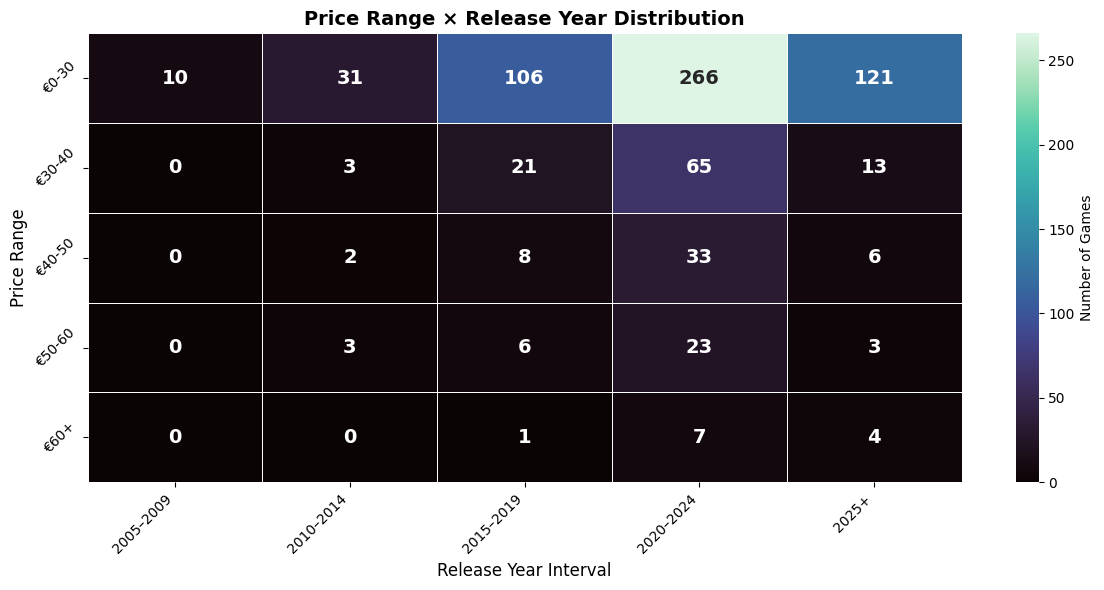

In [10]:
# Extract release year if not already done
if 'release_year' not in df.columns:
    df['release_year'] = df['release_date'].dt.year

# Create price range categories
price_bins = [0, 30, 40, 50, 60, float('inf')]
price_labels = ['€0-30', '€30-40', '€40-50', '€50-60', '€60+']
df['price_range'] = pd.cut(df['original_price_eur'], bins=price_bins, labels=price_labels, right=False)

# Create year interval categories
year_bins = [2000, 2005, 2010, 2015, 2020, 2025, 2030]
year_labels = ['2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024', '2025+']
df['year_interval'] = pd.cut(df['release_year'], bins=year_bins, labels=year_labels, right=False)

# Create cross-tabulation
cross_tab = pd.crosstab(df['price_range'], df['year_interval'])

# Visualize as heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='mako', 
            linewidths=0.5, cbar_kws={'label': 'Number of Games'}, ax=ax,
            annot_kws={'size': 14, 'weight': 'bold'})
ax.set_title('Price Range × Release Year Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Release Year Interval', fontsize=12)
ax.set_ylabel('Price Range', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/nb1/sec_6-2_price_year_crosstab.png', dpi=300, bbox_inches='tight')
plt.show()

# # Also display styled table
# print("\nCross-tabulation: Price Range × Release Year Interval")
# display(cross_tab.style.background_gradient(cmap='mako', axis=None)
#         .format('{:,}')
#         .set_caption('Number of Games by Price Range and Release Period'))

**Key Observations:**

- **Lower-priced games (€0-30) dominate** across all time periods, especially in 2020-2024 and even more so in 2025 considering it is not even a full year
- **Mid-range prices (€30-60) are less common**, suggesting fewer premium-priced releases on Steam
- **Post-2015 growth**: Increased counts across all price categories reflect platform expansion
- **Market shift**: The dominance of lower-priced games may indicate changing market strategies, consumer preferences, or shifts in game types being published

*Note: Further analysis of price distribution over time is needed to determine whether these trends are driven by changing market strategies, consumer demand, or shifts in the types of games being published.*  
The gradual increase in counts across all categories after 2015 reflects the platform’s growth and a larger overall volume of releases in the last decade.  
Further analysis of the **price distribution over time** is needed to determine whether these trends are driven by changing market strategies, consumer demand, or shifts in the types of games being published.


### 6.3 Filtered Dataset (2015-2025)

This step filters the dataset to include only games released in 2015 or later, producing a cleaner dataset for subsequent analysis.


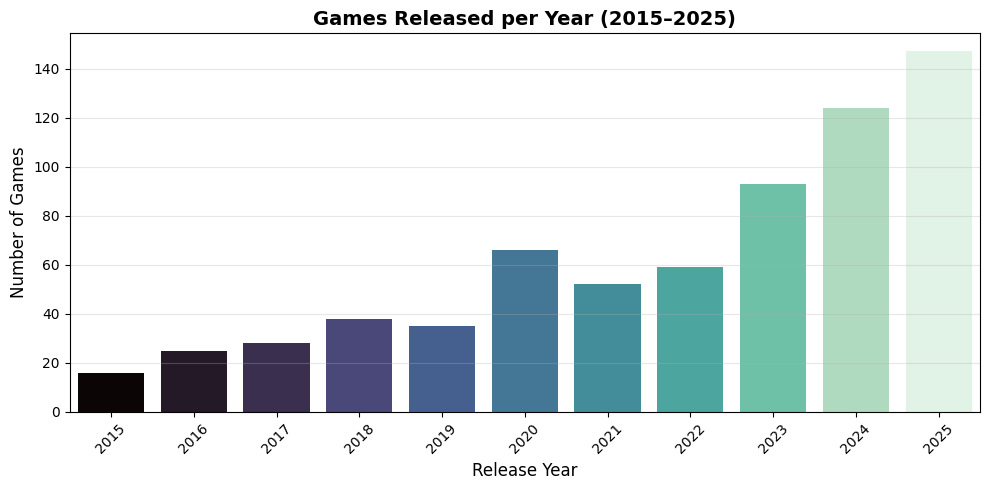

Filtered dataset saved to ../data/steam_sales_post_2015.csv
Total games in filtered dataset: 683


In [11]:
# Filter games released in 2015 or later
df_post_2015 = df[df['release_date'].dt.year >= 2015].copy()

# Ensure release_year is integer
df_post_2015['release_year'] = df_post_2015['release_year'].astype(int)

# Get games per year
games_per_year = df_post_2015['release_year'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=games_per_year.index.astype(str), y=games_per_year.values,
            hue=games_per_year.index, palette='mako', legend=False)
plt.title('Games Released per Year (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/nb1/sec_6-3_releases_post_2015.png', dpi=300, bbox_inches='tight')
plt.show()

# Save to CSV
output_path = "../data/steam_sales_post_2015.csv"
df_post_2015.to_csv(output_path, index=False)

print(f"Filtered dataset saved to {output_path}")
print(f"Total games in filtered dataset: {len(df_post_2015)}")

**Key Insights:**

- **Gradual growth (2015–2019):** Game releases steadily increased as indie publishing expanded.
- **Spike in 2020:** Matches the global rise in digital entertainment consumption during the pandemic.
- **Dip in 2021–2022:** Reflects industry delays and production slowdowns.
- **Strong rise in 2023–2025:** Indicates regained development momentum and larger annual output.

**Why This Matters:**

Filtering to post-2015 produces a dataset that reflects current market behavior. The remaining 683 games provide a strong foundation for subsequent analysis of price trends, review counts, discount patterns, platform availability shifts, and inflation-adjusted pricing.